# Assignment 3.Exercise 4: Learning the XOR gate

I used "Mastering Machine Learning with Scikit-learn" book written by "Gavin Hackeling" [2] Chapter 10, page 212, Topic: "Approximating XOR with Multilayer perceptrons".

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from IPython.display import Image

First, I generate a toy binary classification dataset that reperesents XOR-gate and split it into training and testing sets.  

In [5]:
y = [0,1,1,0] * 1000
X = [[0,0], [0,1], [1,0], [1,1]] * 1000

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

Since we need to create a feed forward neural network with one layer containing two sigmoid neurons, based on sklearn documentation on [1] I use
 ‘logistic’: the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x))

In [7]:
model = MLPClassifier(activation='logistic', 
                      max_iter=100000, hidden_layer_sizes=(2,),alpha=0.001, solver='lbfgs')

I train the network by calling the fit() method:

In [8]:
model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Finally, I print some predictions for manual inspection and evaluate the model's accuracy on the test set. The network approximates the XOR function on the test set:

In [9]:
print('Number of Layers: %s Number of outputs: %s Name of the output activation function: %s' % (model.n_layers_, model.n_outputs_, model.out_activation_))
predictions = model.predict(X_test)
print('Accuracy:', model.score(X_test, y_test))
for i, p in enumerate(predictions[:10]):
    print('True: %s, predicted: %s' % (y_test[i], p))

Number of Layers: 3 Number of outputs: 1 Name of the output activation function: logistic
Accuracy: 1.0
True: 1, predicted: 1
True: 1, predicted: 1
True: 1, predicted: 1
True: 0, predicted: 0
True: 1, predicted: 1
True: 0, predicted: 0
True: 0, predicted: 0
True: 1, predicted: 1
True: 0, predicted: 0
True: 1, predicted: 1


There we can see the weight matrix corresponding to layer i, by calling 'coefs_':

In [10]:
model.coefs_

[array([[26.55020211,  6.33178522],
        [20.6026521 ,  6.8317615 ]]), array([[ 19.08871442],
        [-20.92068878]])]

There we can see the bias vector corresponding to layer i + 1, by calling 'intercepts_':

In [11]:
model.intercepts_

[array([ -9.25629678, -10.83196359]), array([-9.04337045])]

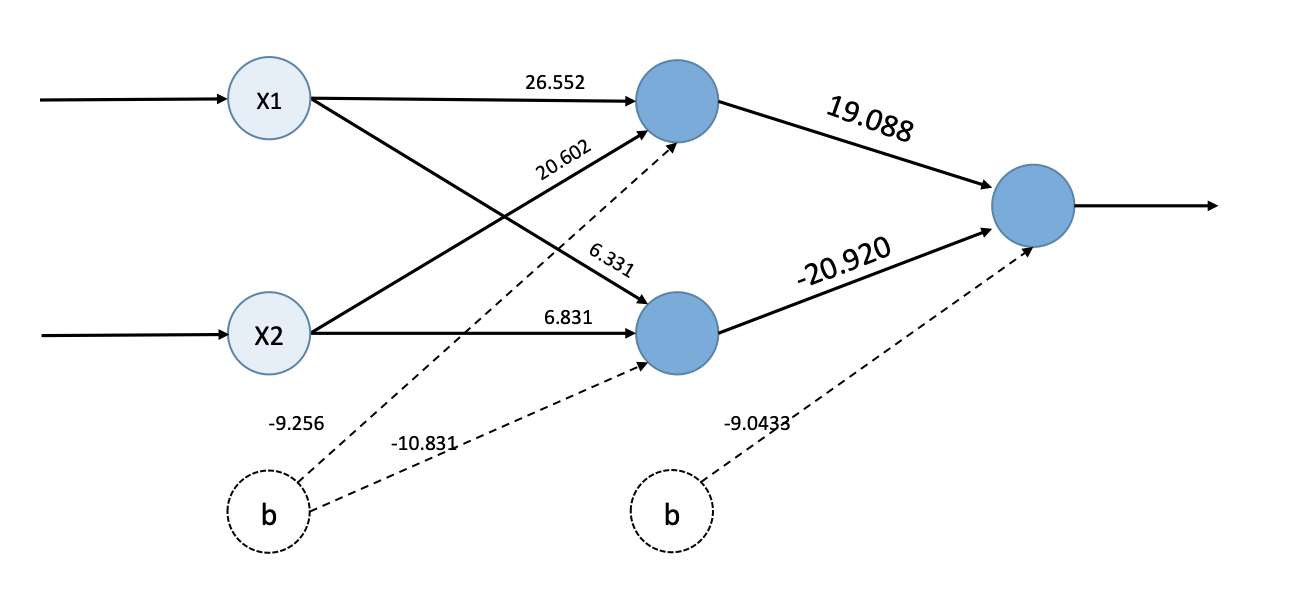

In [12]:
Image("NN.png")

NOTE: It worth to mention that, since Generated training data is in random state, I just run it and get values for weight and bias, then draw picture seperately in 'draw.io' application and add i manually generated picture in here.

### Reference 

[1] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

[2] https://tanthiamhuat.files.wordpress.com/2018/04/mastering-machine-learning-with-scikit-learn.pdf